### 2. Feature Engineering - Emisiones GEI por Sector Industrial

#### 2.0 Imports

In [1]:
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.feature_engineering import (
    extract_gas_emissions, 
    calculate_gas_stats, 
    calculate_proportions, 
    create_target, 
    add_dataset1_features
)
from src import feature_engineering

importlib.reload(feature_engineering)

<module 'src.feature_engineering' from '/Users/dzjuca/Downloads/t4/t4_proyecto/src/feature_engineering.py'>

#### 2.1 Lectura de datos provenientes del EDA

In [2]:
df1 = pd.read_csv('datos/df1_toFeatures.csv')
df2 = pd.read_csv('datos/df2_toFeatures.csv')
print(f"Dataset 1: {df1.shape}")
print(f"Dataset 2: {df2.shape}")

Dataset 1: (1016, 8)
Dataset 2: (18288, 8)


#### 2.2 Extraer Emisiones por Gas desde Dataset 2

In [3]:
gas_emissions = extract_gas_emissions(df2)
print(f"✅ Emisiones por gas extraídas: {gas_emissions.shape}")
gas_emissions.head()

✅ Emisiones por gas extraídas: (1016, 9)


,naics_code,co2_emission,ch4_emission,n2o_emission,hfcs_emission,pfcs_emission,sf6_emission,nf3_emission,hfc_pfc_unspecified
0,111110,0.172,0.013496,0.34450,0.000823,0.000143,0.000105,0.000023,0.000844
1,111120,0.172,0.013496,0.34450,0.000823,0.000143,0.000105,0.000023,0.000844
2,111130,0.207,0.111440,0.52735,0.000794,0.000148,0.000104,0.000023,0.000802
3,111140,0.207,0.111440,0.52735,0.000794,0.000148,0.000104,0.000023,0.000802
4,111150,0.207,0.111440,0.52735,0.000794,0.000148,0.000104,0.000023,0.000802


#### 2.3 Calcular Estadísticas de Gases

In [4]:
gas_stats = calculate_gas_stats(gas_emissions)
print(f"✅ Estadísticas calculadas: {gas_stats.shape}")
gas_stats.head()

✅ Estadísticas calculadas: (1016, 4)


,naics_code,num_gases_emitted,dominant_gas,gas_diversity
0,111110.0,3,n2o,0.753590
1,111120.0,3,n2o,0.753590
2,111130.0,3,n2o,0.915637
3,111140.0,3,n2o,0.915637
4,111150.0,3,n2o,0.915637


#### 2.4 Calcular Proporciones de Gases

In [5]:
gas_props = calculate_proportions(gas_emissions)
print(f"✅ Proporciones calculadas: {gas_props.shape}")
gas_props.head()

✅ Proporciones calculadas: (1016, 4)


,naics_code,co2_proportion,ch4_proportion,n2o_proportion
0,111110.0,0.323348,0.025372,0.647637
1,111120.0,0.323348,0.025372,0.647637
2,111130.0,0.244201,0.131468,0.622124
3,111140.0,0.244201,0.131468,0.622124
4,111150.0,0.244201,0.131468,0.622124




#### 2.5 Agregar Features desde Dataset 1

In [10]:
df1 = add_dataset1_features(df1)
print(f"✅ Features de Dataset 1 agregados")
df1[['naics_code', 'sef_mef_ratio', 'naics_2dig']].head()

✅ Features de Dataset 1 agregados


,naics_code,sef_mef_ratio,naics_2dig
0,111110,11.090909,11
1,111120,11.090909,11
2,111130,20.225000,11
3,111140,20.225000,11
4,111150,20.225000,11



#### 2.6 Crear Variable Objetivo

In [11]:
df1 = create_target(df1)
print(f"✅ Variable objetivo creada")
print("\nDistribución de clases:")
print(df1['impact_class'].value_counts().sort_index())

✅ Variable objetivo creada

Distribución de clases:
impact_class
0    277
1    233
2    252
3    254
Name: count, dtype: int64


#### 2.7 Unir Todos los Features

In [12]:
df_enriched = df1[['naics_code', 'naics_title', 'naics_2dig', 'sef_mef_ratio', 'impact_class']].copy()
df_enriched = df_enriched.merge(gas_emissions, on='naics_code')
df_enriched = df_enriched.merge(gas_stats, on='naics_code')
df_enriched = df_enriched.merge(gas_props, on='naics_code')

print(f"✅ Dataset enriquecido: {df_enriched.shape}")
df_enriched.head()

✅ Dataset enriquecido: (1016, 19)


,naics_code,naics_title,naics_2dig,sef_mef_ratio,impact_class,co2_emission,ch4_emission,n2o_emission,hfcs_emission,pfcs_emission,sf6_emission,nf3_emission,hfc_pfc_unspecified,num_gases_emitted,dominant_gas,gas_diversity,co2_proportion,ch4_proportion,n2o_proportion
0,111110,Soybean Farming,11,11.090909,3,0.172,0.013496,0.34450,0.000823,0.000143,0.000105,0.000023,0.000844,3,n2o,0.753590,0.323348,0.025372,0.647637
1,111120,Oilseed (except Soybean) Farming,11,11.090909,3,0.172,0.013496,0.34450,0.000823,0.000143,0.000105,0.000023,0.000844,3,n2o,0.753590,0.323348,0.025372,0.647637
2,111130,Dry Pea and Bean Farming,11,20.225000,3,0.207,0.111440,0.52735,0.000794,0.000148,0.000104,0.000023,0.000802,3,n2o,0.915637,0.244201,0.131468,0.622124
3,111140,Wheat Farming,11,20.225000,3,0.207,0.111440,0.52735,0.000794,0.000148,0.000104,0.000023,0.000802,3,n2o,0.915637,0.244201,0.131468,0.622124
4,111150,Corn Farming,11,20.225000,3,0.207,0.111440,0.52735,0.000794,0.000148,0.000104,0.000023,0.000802,3,n2o,0.915637,0.244201,0.131468,0.622124




#### 2.8 Validación de Features Creados



#### Verificar valores nulos

In [13]:
print("Valores nulos por columna:")
print(df_enriched.isnull().sum())

Valores nulos por columna:
naics_code             0
naics_title            0
naics_2dig             0
sef_mef_ratio          0
impact_class           0
co2_emission           0
ch4_emission           0
n2o_emission           0
hfcs_emission          0
pfcs_emission          0
sf6_emission           0
nf3_emission           0
hfc_pfc_unspecified    0
num_gases_emitted      0
dominant_gas           0
gas_diversity          0
co2_proportion         0
ch4_proportion         0
n2o_proportion         0
dtype: int64


#### Verificar balance de clases

In [14]:
print("\nDistribución de clases:")
print(df_enriched['impact_class'].value_counts().sort_index())


Distribución de clases:
impact_class
0    277
1    233
2    252
3    254
Name: count, dtype: int64



#### Estadísticas de emisiones por gas

In [17]:
emission_cols = [col for col in df_enriched.columns if col.endswith('_emission')]
print("\nEstadísticas de emisiones (kg CO2e/USD):")
print(df_enriched[emission_cols].describe())


Estadísticas de emisiones (kg CO2e/USD):
       co2_emission  ch4_emission  n2o_emission  hfcs_emission  pfcs_emission  \
count   1016.000000   1016.000000   1016.000000    1016.000000    1016.000000   
mean       0.194926      0.046752      0.035035       0.002069       0.000713   
std        0.210354      0.145747      0.100636       0.004610       0.003876   
min        0.025000      0.001481      0.000710       0.000206       0.000018   
25%        0.089900      0.009240      0.003233       0.000937       0.000127   
50%        0.137000      0.013384      0.005234       0.001258       0.000196   
75%        0.219500      0.023660      0.012091       0.001738       0.000429   
max        3.860000      1.629600      1.020250       0.088102       0.080555   

       sf6_emission  nf3_emission  
count   1016.000000   1016.000000  
mean       0.000378      0.000063  
std        0.000638      0.000410  
min        0.000024      0.000002  
25%        0.000157      0.000015  
50%        0

#### 2.9 Análisis de Correlaciones

#### Matriz de correlación de features numéricos

In [27]:
numeric_cols = df_enriched.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('naics_code')
# numeric_cols.remove('impact_class')

corr_matrix = df_enriched[numeric_cols].corr()

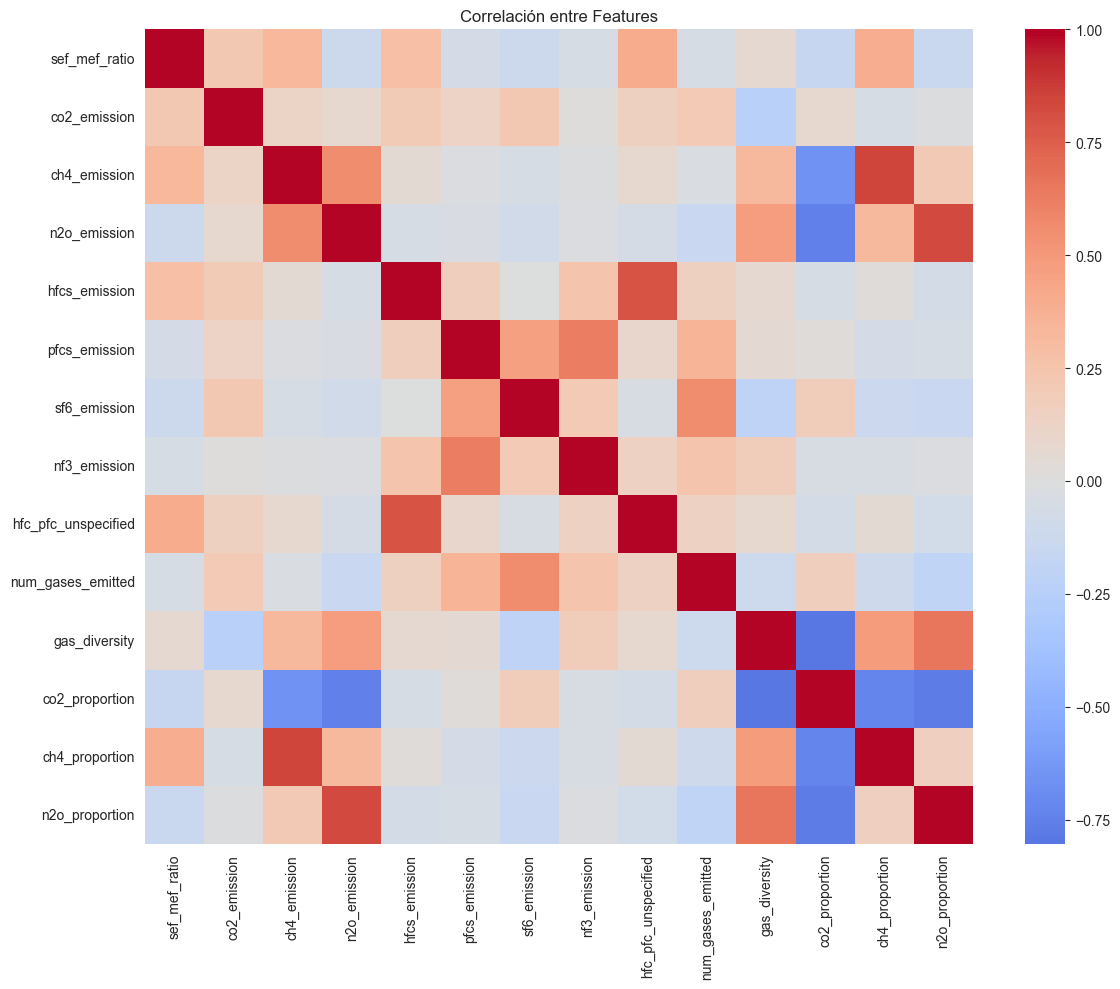

In [28]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlación entre Features')
plt.tight_layout()
plt.show()

#### Top correlaciones

In [31]:
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs < 1.0]
print("\nTop 10 correlaciones más altas:")
print(corr_pairs.abs().sort_values(ascending=False).head(10))


Top 10 correlaciones más altas:
ch4_emission         ch4_proportion         0.846128
ch4_proportion       ch4_emission           0.846128
n2o_proportion       n2o_emission           0.829248
n2o_emission         n2o_proportion         0.829248
gas_diversity        co2_proportion         0.804125
co2_proportion       gas_diversity          0.804125
hfc_pfc_unspecified  hfcs_emission          0.790212
hfcs_emission        hfc_pfc_unspecified    0.790212
co2_proportion       n2o_proportion         0.770653
n2o_proportion       co2_proportion         0.770653
dtype: float64



#### 2.10 Distribución de Features Clave

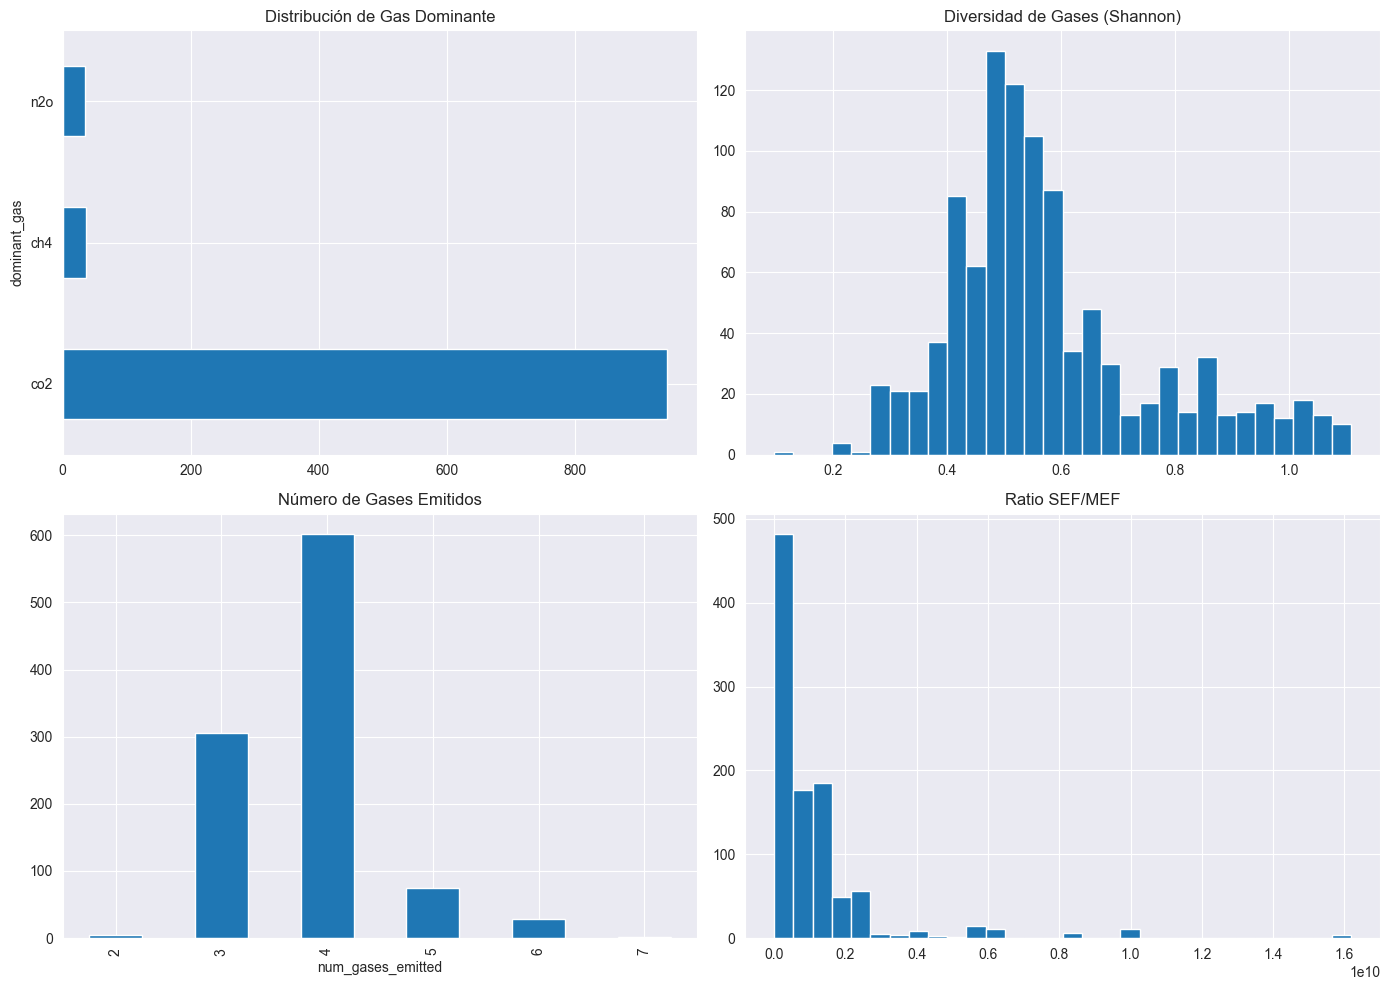

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gas dominante
df_enriched['dominant_gas'].value_counts().plot(kind='barh', ax=axes[0,0])
axes[0,0].set_title('Distribución de Gas Dominante')

# Diversidad de gases
df_enriched['gas_diversity'].hist(bins=30, ax=axes[0,1])
axes[0,1].set_title('Diversidad de Gases (Shannon)')

# Número de gases
df_enriched['num_gases_emitted'].value_counts().sort_index().plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Número de Gases Emitidos')

# Ratio SEF/MEF
df_enriched['sef_mef_ratio'].hist(bins=30, ax=axes[1,1])
axes[1,1].set_title('Ratio SEF/MEF')

plt.tight_layout()
plt.show()



#### 2.11 Proporciones de Gases por Clase

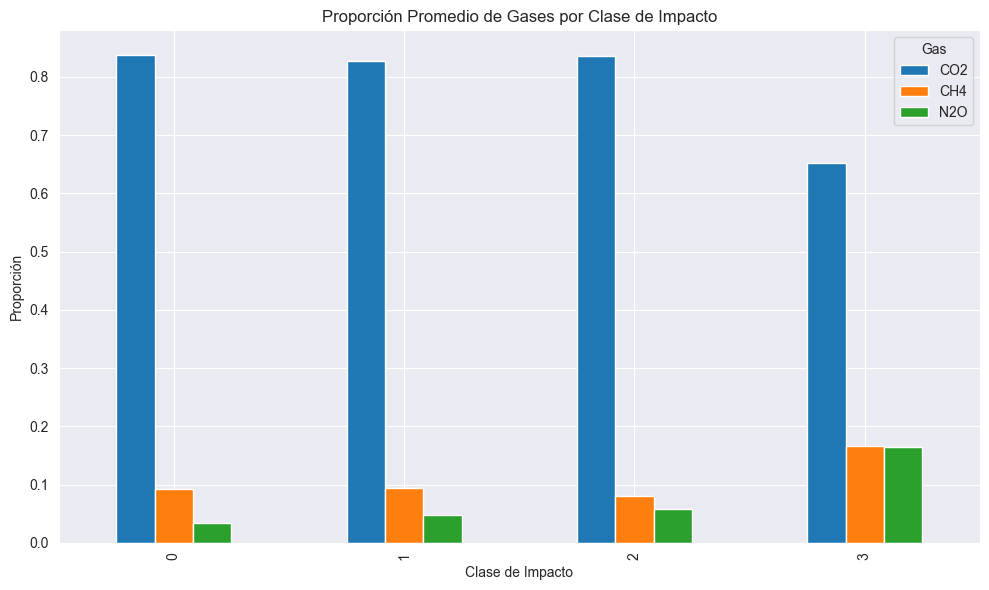

In [38]:
props = df_enriched.groupby('impact_class', observed=True)[['co2_proportion', 'ch4_proportion', 'n2o_proportion']].mean()

props.plot(kind='bar', figsize=(10, 6))
plt.title('Proporción Promedio de Gases por Clase de Impacto')
plt.xlabel('Clase de Impacto')
plt.ylabel('Proporción')
plt.legend(title='Gas', labels=['CO2', 'CH4', 'N2O'])
plt.tight_layout()
plt.show()

### Decisión: Eliminación de Proporciones

Aunque las proporciones muestran patrones interesantes por clase, se decidió **eliminarlas del modelado** por:
- Alta correlación con emisiones absolutas (0.77-0.85)
- `gas_diversity` ya captura la dispersión de gases
- `dominant_gas` ya indica el gas principal
- Evitar multicolinealidad y overfitting

#### 2.12 Guardar Dataset Final

In [40]:
# Seleccionar columnas para modelado (SIN proporciones)
features_for_modeling = [
    'naics_2dig',
    'sef_mef_ratio',
    'co2_emission', 'ch4_emission', 'n2o_emission',
    'hfcs_emission', 'pfcs_emission', 'sf6_emission', 
    'nf3_emission', 'hfc_pfc_unspecified',
    'num_gases_emitted', 'gas_diversity', 'dominant_gas',
    'impact_class'
]

df_modeling = df_enriched[['naics_code', 'naics_title'] + features_for_modeling].copy()

# Guardar
df_modeling.to_csv('datos/dataset_for_modeling.csv', index=False)
print(f"✅ Dataset guardado: {df_modeling.shape}")
print(f"📊 Features: {len(features_for_modeling)-1}, Target: impact_class")

✅ Dataset guardado: (1016, 16)
📊 Features: 13, Target: impact_class
